In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

In [5]:
data = pd.read_pickle('../data/data_full.pkl')

In [6]:
data_train = data.loc[data.index < '2023-10-30']
data_test = data.loc[data.index >= '2023-10-30']

In [7]:
X_train = data_train.drop('demand', axis=1)
X_test = data_test.drop('demand', axis=1)

y_train = data_train['demand']
y_train.name = 'Actual demand (train)'
y_test = data_test['demand']
y_test.name = 'Actual demand (test)'

# Model Implementation

In [8]:
from prophet import Prophet

In [37]:
prophet_uni_train = y_train.tz_convert(None).reset_index().rename(columns={
    'index':'ds',
    'Actual demand (train)':'y'
})

prophet_uni_test = y_test.tz_convert(None).reset_index().rename(columns={
    'index':'ds',
    'Actual demand (test)':'y'
}).drop('y', axis=1)

In [28]:
model = Prophet(changepoint_prior_scale=0.001)
model.add_country_holidays(country_name='UK')
model.fit(prophet_uni_train)

16:28:56 - cmdstanpy - INFO - Chain [1] start processing
16:28:58 - cmdstanpy - INFO - Chain [1] done processing


In [47]:
forecast = model.predict(prophet_uni_test)

## Prediction

In [53]:
y_pred = forecast['yhat']

In [60]:
y_pred.to_numpy()

array([22742.30516078, 22575.60281214, 22433.25581819, ...,
       30678.43045043, 30194.44963222, 29864.01019131])

## Prediction Statistics

In [63]:
y_pred_s = pd.Series(y_pred.to_numpy(), index=y_test.index, name='Predicted demand (test)')

### 24 Hours Forecast

In [66]:
y_pred_48 = y_pred_s.iloc[:48]
y_test_48 = y_test.iloc[:48]

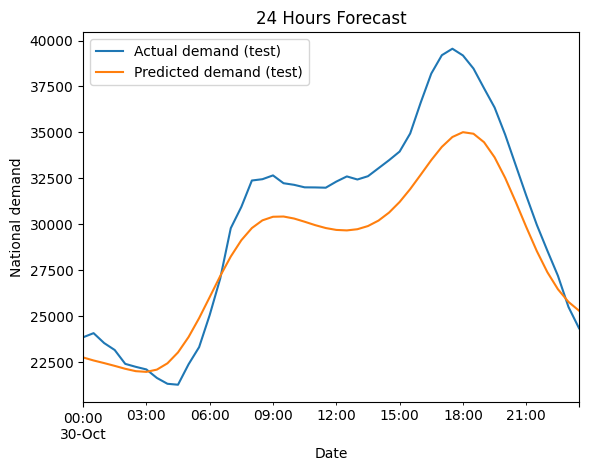

In [67]:
fig, ax = plt.subplots()
y_test_48.plot(ax=ax)
y_pred_48.plot(ax=ax)
ax.legend()
ax.set_title('24 Hours Forecast')
ax.set_xlabel("Date")
ax.set_ylabel("National demand")
plt.show()

In [68]:
print(f'RMSE for 24 hours: {mean_squared_error(y_test_48, y_pred_48, squared=False)}')

RMSE for 24 hours: 2371.0402379693296


### 7 Days Prediction

In [69]:
y_pred_336 = y_pred_s.iloc[:336]
y_test_336 = y_test.iloc[:336]

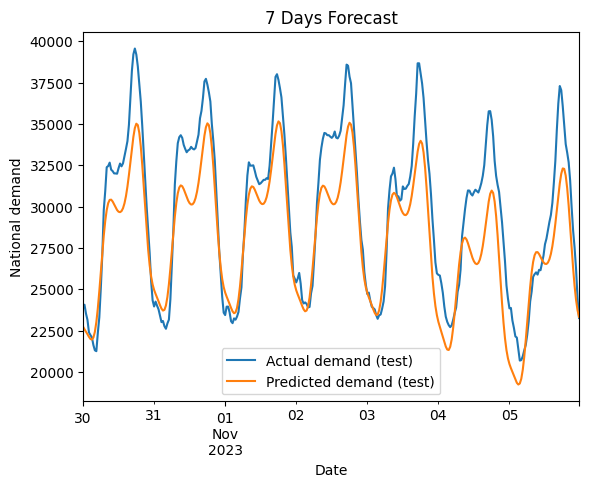

In [70]:
fig, ax = plt.subplots()
y_test_336.plot(ax=ax)
y_pred_336.plot(ax=ax)
ax.legend()
ax.set_title('7 Days Forecast')
ax.set_xlabel("Date")
ax.set_ylabel("National demand")
plt.show()

In [71]:
print(f'RMSE for 7 days: {mean_squared_error(y_test_336, y_pred_336, squared=False)}')

RMSE for 7 days: 2438.8604236283977


### 28 Days Prediction

In [72]:
y_pred_1344 = y_pred_s.iloc[:1344]
y_test_1344 = y_test.iloc[:1344]

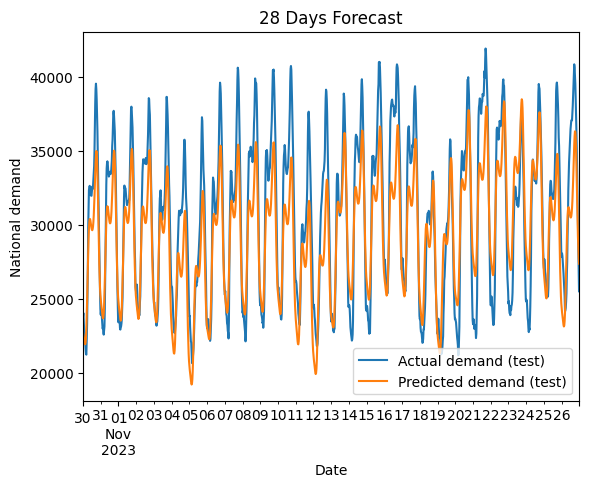

In [73]:
fig, ax = plt.subplots()
y_test_1344.plot(ax=ax)
y_pred_1344.plot(ax=ax)
ax.legend()
ax.set_title('28 Days Forecast')
ax.set_xlabel("Date")
ax.set_ylabel("National demand")
plt.show()

In [74]:
print(f'RMSE for 28 days: {mean_squared_error(y_test_1344, y_pred_1344, squared=False)}')

RMSE for 28 days: 2780.6861614863647
